In [ ]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 문제 1번

## 데이터 확인

기본 세팅

In [ ]:
# 기본적인 라이브러리
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터 불러오기

In [ ]:
path = '/content/drive/MyDrive/DSL/정규세션/0131_HW/house.csv'
house = pd.read_csv(path)
house.head()

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,deposit,monthlyPay
0,0,2233636969,37.677967,127.041725,dobong,아파트,매매,5,5,81,63,남향,ok. 일조량 및 관리 잘 된 복층,"['10년이내', '역세권', '복층', '탑층']",63000,0
1,3,2232935032,37.657623,127.044115,dobong,아파트,매매,15,24,154,119,남향,기본 로얄동 로얄층 채광 GOOD,"['25년이내', '대단지', '대형평수', '방네개이상']",140000,0
2,4,2232502309,37.645001,127.040034,dobong,빌라,전세,3,4,38,33,남향,올수리 베란다크고 주차 남향 초등학교 대형마트 재래시장 5분,"['25년이상', '융자금적은', '올수리', '화장실한개']",15000,0
3,5,2232883418,37.666850,127.039420,dobong,아파트,매매,5,18,107,84,남향,내부상태아주좋습니다 방학역세권 도깨비시장근접함 주인거주,"['25년이상', '방세개', '화장실두개', '주차가능']",60000,0
4,6,2234171117,37.655622,127.041475,dobong,사무실,월세,2,8,30,22,북향,빠른입주가능 상태깨끗 창동역도보7분 사무실강추,"['25년이내', '융자금없는', '주차가능', '북향']",700,44


## 데이터 정제

데이터 찍먹

In [ ]:
house.shape

(93995, 16)

In [ ]:
house.columns

Index(['Unnamed: 0', 'id', 'lat', 'lng', 'gu', 'goodsType', 'payType', 'floor',
       'floor_total', 'contractArea', 'realArea', 'direction', 'tag',
       'tagList', 'deposit', 'monthlyPay'],
      dtype='object')

In [ ]:
house.isnull().sum()

Unnamed: 0         0
id                 0
lat                0
lng                0
gu                 0
goodsType          0
payType            0
floor              0
floor_total        0
contractArea       0
realArea           0
direction       3204
tag             4529
tagList            0
deposit            0
monthlyPay         0
dtype: int64

In [ ]:
# direction - null값이 너무 많음
# tag - 나중에 삭제할 변수
# null값을 가진 행(데이터)을 제거해준다.
house.dropna(subset = ['direction'], inplace=True)

# 변경된 결과를 확인
house.isnull().sum()  

Unnamed: 0         0
id                 0
lat                0
lng                0
gu                 0
goodsType          0
payType            0
floor              0
floor_total        0
contractArea       0
realArea           0
direction          0
tag             4238
tagList            0
deposit            0
monthlyPay         0
dtype: int64

### 변수 제거

(array([8.9145e+04, 1.3760e+03, 1.7600e+02, 5.2000e+01, 2.2000e+01,
        5.0000e+00, 1.2000e+01, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([      0.,  240000.,  480000.,  720000.,  960000., 1200000.,
        1440000., 1680000., 1920000., 2160000., 2400000.]),
 <a list of 10 Patch objects>)

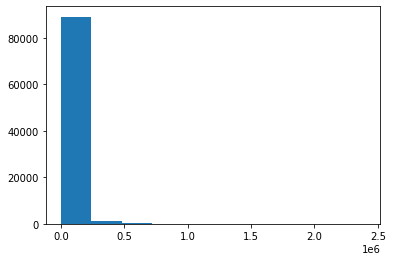

In [ ]:
# y값 = 'deposit(보증금)'열

# y(label)값 뜯어내기
y_label = house.loc[:,'deposit']

# y값 분포 확인
y_label.value_counts()
plt.hist(y_label.values)

# 결론
# y값 = exist -> Supervised
# y값 = 연속형 -> regression

In [ ]:
# 위의 y값을 제외한 진정한 X값들로 이루어진 features 만들기

X_features = house.drop(['deposit'], axis=1)
X_features.columns

Index(['Unnamed: 0', 'id', 'lat', 'lng', 'gu', 'goodsType', 'payType', 'floor',
       'floor_total', 'contractArea', 'realArea', 'direction', 'tag',
       'tagList', 'monthlyPay'],
      dtype='object')

In [ ]:
# X_features 열들이 ['연속형','범주형']인지 확인
X_features.head()

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,monthlyPay
0,0,2233636969,37.677967,127.041725,dobong,아파트,매매,5,5,81,63,남향,ok. 일조량 및 관리 잘 된 복층,"['10년이내', '역세권', '복층', '탑층']",0
1,3,2232935032,37.657623,127.044115,dobong,아파트,매매,15,24,154,119,남향,기본 로얄동 로얄층 채광 GOOD,"['25년이내', '대단지', '대형평수', '방네개이상']",0
2,4,2232502309,37.645001,127.040034,dobong,빌라,전세,3,4,38,33,남향,올수리 베란다크고 주차 남향 초등학교 대형마트 재래시장 5분,"['25년이상', '융자금적은', '올수리', '화장실한개']",0
3,5,2232883418,37.666850,127.039420,dobong,아파트,매매,5,18,107,84,남향,내부상태아주좋습니다 방학역세권 도깨비시장근접함 주인거주,"['25년이상', '방세개', '화장실두개', '주차가능']",0
4,6,2234171117,37.655622,127.041475,dobong,사무실,월세,2,8,30,22,북향,빠른입주가능 상태깨끗 창동역도보7분 사무실강추,"['25년이내', '융자금없는', '주차가능', '북향']",44


변수 처리 0. tag, tagLists는 vector화가 어려우므로 제거 

In [ ]:
X_features = X_features.drop(['tag' , 'tagList'], axis=1)
X_features.columns

Index(['Unnamed: 0', 'id', 'lat', 'lng', 'gu', 'goodsType', 'payType', 'floor',
       'floor_total', 'contractArea', 'realArea', 'direction', 'monthlyPay'],
      dtype='object')

변수 처리 1. 의미 없는 열 제거

In [ ]:
#의미 없는 열 -> 'Unnamed: 0', 'id', 'lat', 'lng'
X_features = X_features.drop(['Unnamed: 0' , 'id', 'lat', 'lng'], axis=1)
X_features.columns

Index(['gu', 'goodsType', 'payType', 'floor', 'floor_total', 'contractArea',
       'realArea', 'direction', 'monthlyPay'],
      dtype='object')

변수처리 2. (선택) 종류 많은 변수 제거 (본인의 능력으로 다루기 어려울 것으로 판단)

In [ ]:
X_features = X_features.drop(['goodsType', 'gu'], axis=1)
X_features.columns

Index(['payType', 'floor', 'floor_total', 'contractArea', 'realArea',
       'direction', 'monthlyPay'],
      dtype='object')

one-hot encoding
-> 다중공선성 문제 해결을 위해 drop_first=True 시행

In [ ]:
#one-hot encoding - direction 
dir = pd.get_dummies(house.loc[:,'direction'], drop_first = True)

X_features = X_features.drop(['direction'], axis=1)
X_features = pd.concat([X_features, dir], axis=1)
X_features.head()

,payType,floor,floor_total,contractArea,realArea,monthlyPay,남서향,남향,동향,북동향,북서향,북향,서향
0,매매,5,5,81,63,0,0,1,0,0,0,0,0
1,매매,15,24,154,119,0,0,1,0,0,0,0,0
2,전세,3,4,38,33,0,0,1,0,0,0,0,0
3,매매,5,18,107,84,0,0,1,0,0,0,0,0
4,월세,2,8,30,22,44,0,0,0,0,0,1,0


In [ ]:
#one-hot encoding - paytype
paytype = pd.get_dummies(house.loc[:,'payType'], drop_first = True)

X_features = X_features.drop(['payType'], axis=1)
X_features = pd.concat([X_features, paytype], axis=1)
X_features.head()

,floor,floor_total,contractArea,realArea,monthlyPay,남서향,남향,동향,북동향,북서향,북향,서향,매매,월세,전세
0,5,5,81,63,0,0,1,0,0,0,0,0,1,0,0
1,15,24,154,119,0,0,1,0,0,0,0,0,1,0,0
2,3,4,38,33,0,0,1,0,0,0,0,0,0,0,1
3,5,18,107,84,0,0,1,0,0,0,0,0,1,0,0
4,2,8,30,22,44,0,0,0,0,0,1,0,0,1,0


변수 처리 3. 다중공선성 - 상관계수로 제거
 -> x2_features에 저장

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54693 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_

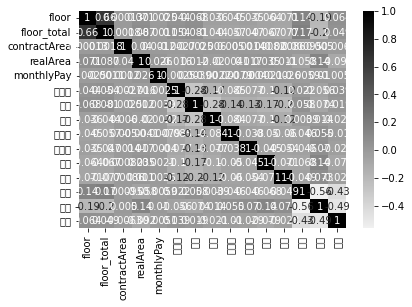

In [ ]:
#상관계수(시각적)
cmap = sns.light_palette(color="black", as_cmap=True)
sns.heatmap(X_features.corr(), annot=True, cmap=cmap)
plt.show()

In [ ]:
#상관계수(수치적)
cor_matrix = abs(X_features.corr())

for i in range(len(cor_matrix.columns)):
    cor_matrix.iloc[i,i] = 0

cor_matrix

,floor,floor_total,contractArea,realArea,monthlyPay,남서향,남향,동향,북동향,북서향,북향,서향,매매,월세,전세
floor,0.000000,0.659679,0.000133,0.070722,0.002528,0.043996,0.067796,0.035654,0.045322,0.034896,0.063574,0.071276,0.141475,0.194291,0.064006
floor_total,0.659679,0.000000,0.001801,0.087295,0.001119,0.054321,0.080861,0.044399,0.057465,0.047127,0.066624,0.077399,0.165997,0.203690,0.049003
contractArea,0.000133,0.001801,0.000000,0.039653,0.001163,0.002727,0.002505,0.006045,0.004997,0.001351,0.000822,0.000856,0.000947,0.004963,0.006289
realArea,0.070722,0.087295,0.039653,0.000000,0.026248,0.016308,0.011925,0.019837,0.004138,0.016957,0.034859,0.011073,0.058389,0.143174,0.092291
monthlyPay,0.002528,0.001119,0.001163,0.026248,0.000000,0.002518,0.003855,0.002175,0.000788,0.000395,0.002100,0.002596,0.005891,0.010420,0.005123
남서향,0.043996,0.054321,0.002727,0.016308,0.002518,0.000000,0.283959,0.169369,0.084542,0.076772,0.100480,0.119930,0.021714,0.055577,0.039182
남향,0.067796,0.080861,0.002505,0.011925,0.003855,0.283959,0.000000,0.282976,0.141250,0.128268,0.167879,0.200376,0.058346,0.074471,0.019095
동향,0.035654,0.044399,0.006045,0.019837,0.002175,0.169369,0.282976,0.000000,0.084249,0.076506,0.100132,0.119515,0.003887,0.013870,0.020591
북동향,0.045322,0.057465,0.004997,0.004138,0.000788,0.084542,0.141250,0.084249,0.000000,0.038189,0.049982,0.059657,0.046231,0.054686,0.009979
북서향,0.034896,0.047127,0.001351,0.016957,0.000395,0.076772,0.128268,0.076506,0.038189,0.000000,0.045388,0.054174,0.046264,0.070486,0.028681


In [ ]:
# 상관관계값이 가장 큰 두 축을 찾기

idx = np.where(cor_matrix == cor_matrix.max().max())[0]
print('columns of max corr : {} & {}'.format(cor_matrix.columns[idx[0]], cor_matrix.columns[idx[1]]))

columns of max corr : floor & floor_total


In [ ]:
# 서로 상관관계가 높은 것들 중 y_label과의 상관관계가 높은 것을 남겨두고, 낮은 것을 제거한다. 

print('floor :', X_features.loc[:,'floor'].corr(y_label))
print('floor_total :', X_features.loc[:,'floor_total'].corr(y_label))

floor : 0.31418399153410287
floor_total : 0.38327938252404287


In [ ]:
# y_label과 상관계수값이 더 작은 'floor'열을 제거한다.

X2_features = X_features.drop('floor', axis=1)
X2_features.columns

Index(['floor_total', 'contractArea', 'realArea', 'monthlyPay', '남서향', '남향',
       '동향', '북동향', '북서향', '북향', '서향', '매매', '월세', '전세'],
      dtype='object')

변수 처리 4. 다중공선성으로 제거 - VIF로 제거 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 값을 저장할 데이터프레임 변수
vif = pd.DataFrame()

# 첫번째 features축은 columns이름으로
vif["features"] = X2_features.columns # 독립변수들의 이름들로 구성된 features열 추가

# 두번째 축은 VIF값을 계산하여 집어넣기
vif["VIF Factor"] = [variance_inflation_factor(X2_features.values, i).astype(float)  for i in range(X2_features.shape[1])]# 리스트내포

vif

,features,VIF Factor
0,floor_total,2.914996
1,contractArea,1.002434
2,realArea,1.346447
3,monthlyPay,1.000835
4,남서향,1.789648
5,남향,2.743875
6,동향,1.787331
7,북동향,1.229232
8,북서향,1.192088
9,북향,1.335624


변수처리 5. t-test로 변수 제거 
-> X3_features에 저장
- 0.05 이상인 값 제거


In [ ]:
# Linear Regression모델 적용 시, 통계적 정보를 주는 라이브러리
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 상수항을 추가한 다중선형회귀

X_constant = sm.add_constant(X2_features, has_constant='add') # has_constant='add'; 상수항 추가
lin_model_constant = sm.OLS(y_label, X_constant) # OLS기법 적용
lin_model_constant = lin_model_constant.fit() # 모델 학습
lin_model_constant.summary()

#contractarea, monthlypay 제거

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                deposit   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     3956.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:54:09   Log-Likelihood:            -1.1200e+06
No. Observations:               90791   AIC:                         2.240e+06
Df Residuals:                   90776   BIC:                         2.240e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.819e+04   2971.457     -6.123      0.000    -2.4e+04   -1.24e+04
floor_total   2006.0152     21.202     94.612      0.000    1964.459    2047.572
contractArea     0.0110      0.039      0.284      0.776      -0.065       0.087
realArea        94.6071      1.269     74.527      0.000      92.119      97.095
monthlyPay      -0.0049      0.004     -1.132      0.258      -0.013       0.004
남서향          -1379.8566    645.069     -2.139      0.032   -2644.186    -115.527
남향            5741.5978    538.357     10.665      0.000    4686.424    6796.771
동향           -9576.8460    647.762    -14.785      0.000   -1.08e+04   -8307.238
북동향          -9573.6635   1011.992     -9.460      0.000   -1.16e+04   -7590.169
북서향          -1.041e+04   1093.820     -9.521      0.000   -1.26e+04   -8270.713
북향           -1.353e+04    895.944    -15.104      0.000   -1.53e+04   -1.18e+04
서향           -1.279e+04    789.203    -16.207      0.000   -1.43e+04   -1.12e+04
매매            8.055e+04   2953.802     27.271      0.000    7.48e+04    8.63e+04
월세            5941.9845   2951.344      2.013      0.044     157.379    1.17e+04
전세             4.06e+04   2956.969     13.729      0.000    3.48e+04    4.64e+04
==============================================================================
Omnibus:                   130674.518   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        113137504.894
Skew:                           8.292   Prob(JB):                         0.00
Kurtosis:                     175.140   Cond. No.                     1.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X3_features = X2_features.drop(['contractArea','monthlyPay'], axis=1)
X3_features.columns

Index(['floor_total', 'realArea', '남서향', '남향', '동향', '북동향', '북서향', '북향', '서향',
       '매매', '월세', '전세'],
      dtype='object')



## 데이터 분할 및 LinearRegression

#### 데이터 분할 

학습, 테스트 데이터 8:2비율로 분할

random state=1 으로 지정

In [ ]:
from sklearn.model_selection import train_test_split

# X3_features 사용

train_X, test_X, train_y, test_y = train_test_split(X3_features, y_label, train_size=0.8,
                                                    test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(72632, 12) (18159, 12) (72632,) (18159,)


#### 평가 지표

In [ ]:
# 회귀(y값이 연속형변수)의 평가지표

from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    # MSE는 제곱이기에 값이 큼으로 r-MSE(root)를 이용한다.
    # MSE는 scikit-learn의 mean_squared_error()로 계산
    rmse_val = np.sqrt(mean_squared_error(y,pred))
    # MAE는 scikit-learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)

    # (r-MSE & MAE)를 출력 후, 반환해주는 함수
    print('RMSE: {0:.3F}, MAE: {1:.3F}'.format(rmse_val, mae_val))
    return (rmse_val, mae_val)

#### 다중선형회귀

RMSE: 56619.657, MAE: 27512.533


<BarContainer object of 2 artists>

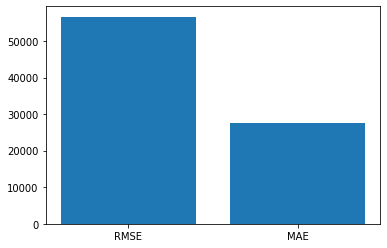

In [ ]:
from sklearn.linear_model import LinearRegression

# Model
lr_model = LinearRegression()
lr_model.fit(train_X, train_y) # 최적화식을 풀어 학습파라미티(회귀계수)를 구한다.
pred = lr_model.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

#### Ridge / Lasso

In [ ]:
# 데이터 전처리에 사용되는 라이브러리
from sklearn.model_selection import cross_val_score

# 규제항이 있는 선형회귀 관련 라이브러리
from sklearn.linear_model import Ridge, Lasso

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+13, tolerance: 3.168e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+13, tolerance: 3.145e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.554e+13, tolerance: 3.158e+10

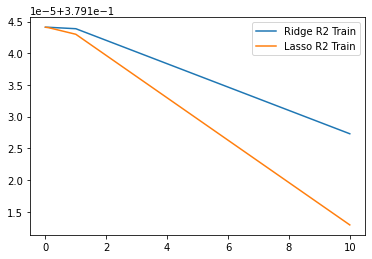

In [ ]:
# hyper-parameter 후보
alpha_list = [0.001, 0.01, 0.1, 1, 10]


# 모델 평가와 관련된 라이브러리
from sklearn import metrics
from sklearn.metrics import r2_score # R^2

# 각 모델을 비교하기 위한 평가지표인 r2-score를 저장할 장소
ridge_r2_list_train = []
ridge_r2_list_test = []
lasso_r2_list_train = []
lasso_r2_list_test = []

# 모든 'hyper-parameter'에 대해 하나씩 수행
for alpha in alpha_list:

    # 모델 객체 선언; Ridge(), Lasso()
    # alpha <- hyper-parameter 하나씩 대입
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)
    


    # # 이전처럼 'k-fold학습'을 쓰지 않고, 그냥 학습
    # ridge_model.fit(train_X,train_y)
    # lasso_model.fit(train_X,train_y)
    # #테스트; sklearn.metrics에 있는 r2_score()함수를 가져와 평가
    # ridge_r2_list_test.append(r2_score(test_y,ridge_model.predict(test_X)))
    # lasso_r2_list_test.append(r2_score(test_y,lasso_model.predict(test_X)))

    # kfold 통해 성능평가; 즉, train_set을 8:2로 나누는 것을 10번 반복해서 학습을 진행하는 것이다.
    # cross_val_score()에서 scoring='r2'로 두고 평가
    # 즉, train_set만을 가지고 학습 및 평가(검증)를 진행한다.
    # test_set은 사용하지 않는다.
    ridge_r2_list_train.append(np.mean(cross_val_score(ridge_model,train_X,train_y,scoring='r2',cv=10)))
    lasso_r2_list_train.append(np.mean(cross_val_score(lasso_model,train_X,train_y,scoring='r2',cv=10)))
    
    

plt.plot(alpha_list, ridge_r2_list_train, label='Ridge R2 Train')
plt.plot(alpha_list, lasso_r2_list_train, label='Lasso R2 Train')

plt.legend()

# r2지표는 높을수록 좋음으로, Ridge&Lasso 모두 alpha=0.001일 때 가장 모델의 성능이 좋다.

In [ ]:
# 차례로 'alpha = [0.001, 0.01, 0.1, 1, 10]'을 했을 때, Ridge모델에 대한 r2평가지표
ridge_r2_list_train

[0.37914410345745336,
 0.3791441031713254,
 0.3791440984684697,
 0.3791438716450325,
 0.3791273016040224]

In [ ]:
# 차례로 'alpha = [0.001, 0.01, 0.1, 1, 10]'을 했을 때, Lasso모델에 대한 r2평가지표
lasso_r2_list_train

[0.3791441032381061,
 0.3791440982085177,
 0.37914404251795997,
 0.37914299295835774,
 0.3791129214832181]

#### hyper-parameter

In [ ]:
# 가장 성능이 좋은 모델의 hyper-parameter 확인

idx1 = np.array(ridge_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index
idx2 = np.array(lasso_r2_list_train).argsort()[::-1][0] # 가장 큰 것의 index

print('Ridge best alpha :', alpha_list[idx1])
print('Lasso best alpha :', alpha_list[idx2])

Ridge best alpha : 0.001
Lasso best alpha : 0.001


In [ ]:
# 각각 alpha = 0.001으로 두고, ridge와 lasso 적합

# 모델 객체 선언, 이 때 위에서 구한 최적의 hyper-parameter를 넣어준다.
ridge = Ridge(alpha=0.001) # 'fit_intercept=True' : 절편을 넣어줄지에 대한 여부
lasso = Lasso(alpha=0.001)

# 모델 학습; 이번에는 학습데이터를 학습&검증데이터로 나누는 것이 아닌
# 학습데이터로 학습하고, 테스트데이터로 테스트를 한다.
ridge.fit(train_X, train_y)
lasso.fit(train_X, train_y)

# 모델 평가
# R^2; r2_score
# 여기서 매우 조심해야할 사항이 있다.
# 그것은 바로 r2_score()와 mean_squared_error() 모두 인자의 순서를 주의해서 넣어주어야한다는 것이다.
# 모두 (정닶값,예측값) 순으로 넣어주어야한다.
# mse는 어차피 같은 값이 나오지만, r2_score는 조심해야한다.
print("R square score for Ridge model : {:.5f}".format(r2_score(test_y, ridge.predict(test_X))))
print("R square score for Lasso model : {:.5f}".format(r2_score(test_y, lasso.predict(test_X))))

# MSE; mean_squared_error
print("MSE for Ridge model : {:.5f}".format(mean_squared_error(test_y, ridge.predict(test_X))))
print("MSE for Lasso model : {:.5f}".format(mean_squared_error(test_y, lasso.predict(test_X))))

R square score for Ridge model : 0.37299
R square score for Lasso model : 0.37299
MSE for Ridge model : 3205785570.08615
MSE for Lasso model : 3205785577.98290


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+13, tolerance: 3.516e+10
  model = cd_fast.enet_coordinate_descent(


RMSE: 56619.657, MAE: 27512.533


<BarContainer object of 2 artists>

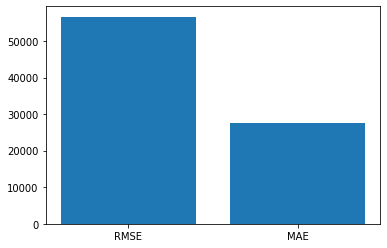

In [ ]:
pred = ridge.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

RMSE: 56619.657, MAE: 27512.531


<BarContainer object of 2 artists>

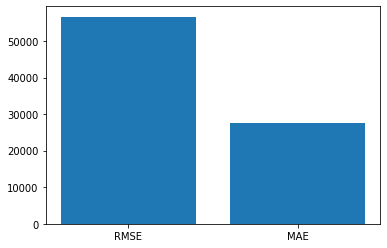

In [ ]:
pred = lasso.predict(test_X) # 구한 회귀계수로 모델을 만들고, test_X로 test_y값을 예측한다.

result = evaluate_regr(test_y, pred) # 실제 값인 test_y과 예측값인 pred를 비교한다. 이 때, 회귀와 관련된 평가지표를 사용
plt.bar(['RMSE','MAE'], result)

- R2 score: 높은 값
- RMSE: 낮은 값
을 선택!

-> R2: Ridge, Lasso 동일, 


-> RMSE: Lasso가 근소한 차이로 낮으므로


=> Lasso 선택


## 변수 중요도

일반적으로 회귀계수의 크기가 클수록 해당 X변수의 중요도가 높다. 하지만 회귀계수의 의미를 생각하면, X변수를 스케일링에 따라 다르게 해석할 수 있다.

최종적으로 선택해서 학습까지 완료시킨 ridge모델을 사용

#### 1. 스케일링 없이

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=f

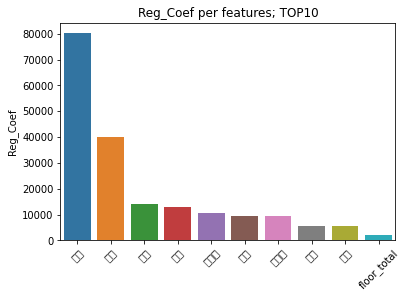

In [ ]:
# 표준화한 회귀계수의 절댓값
coef = ridge.coef_
coef_abs = np.abs(coef)

# 회귀계수의 절댓값 크기 index
idx = coef_abs.argsort()[::-1]

# 회귀계수의 절댓값을 큰 순서대로 정렬
coef_abs = coef_abs[idx]

# 회귀계수의 독립변수이름을 큰 순서대로 정렬
name = X3_features.head(1).columns[idx].values

# top10
sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features; TOP10')
plt.show()

####2. min-max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

total_data = pd.concat([X3_features, y_label], axis=1)

scaler = MinMaxScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=total_data.columns)
trans_data_df.head(1) # 0~1 사이의 값들을 가짐을 확인할 수 있다

,floor_total,realArea,남서향,남향,동향,북동향,북서향,북향,서향,매매,월세,전세,deposit
0,0.00489,0.005172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.02625


####3. standard

In [ ]:
from sklearn.preprocessing import StandardScaler

total_data = pd.concat([X3_features, y_label], axis=1)

scaler = StandardScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=total_data.columns)
trans_data_df.head(1) 

,floor_total,realArea,남서향,남향,동향,북동향,북서향,북향,서향,매매,월세,전세,deposit
0,-0.751729,-0.114482,-0.412258,1.451823,-0.410831,-0.20507,-0.186223,-0.243731,-0.29091,1.414167,-0.79677,-0.615022,0.171719


In [ ]:
ridge.coef_

array([  1970.9707104 ,     96.87410749,  -1354.08504742,   5699.46410242,
        -9378.39179288,  -9275.78574124, -10766.52071178, -13918.48150614,
       -12974.69088541,  80115.2427661 ,   5496.50706097,  40113.41281253])

# 문제 2번

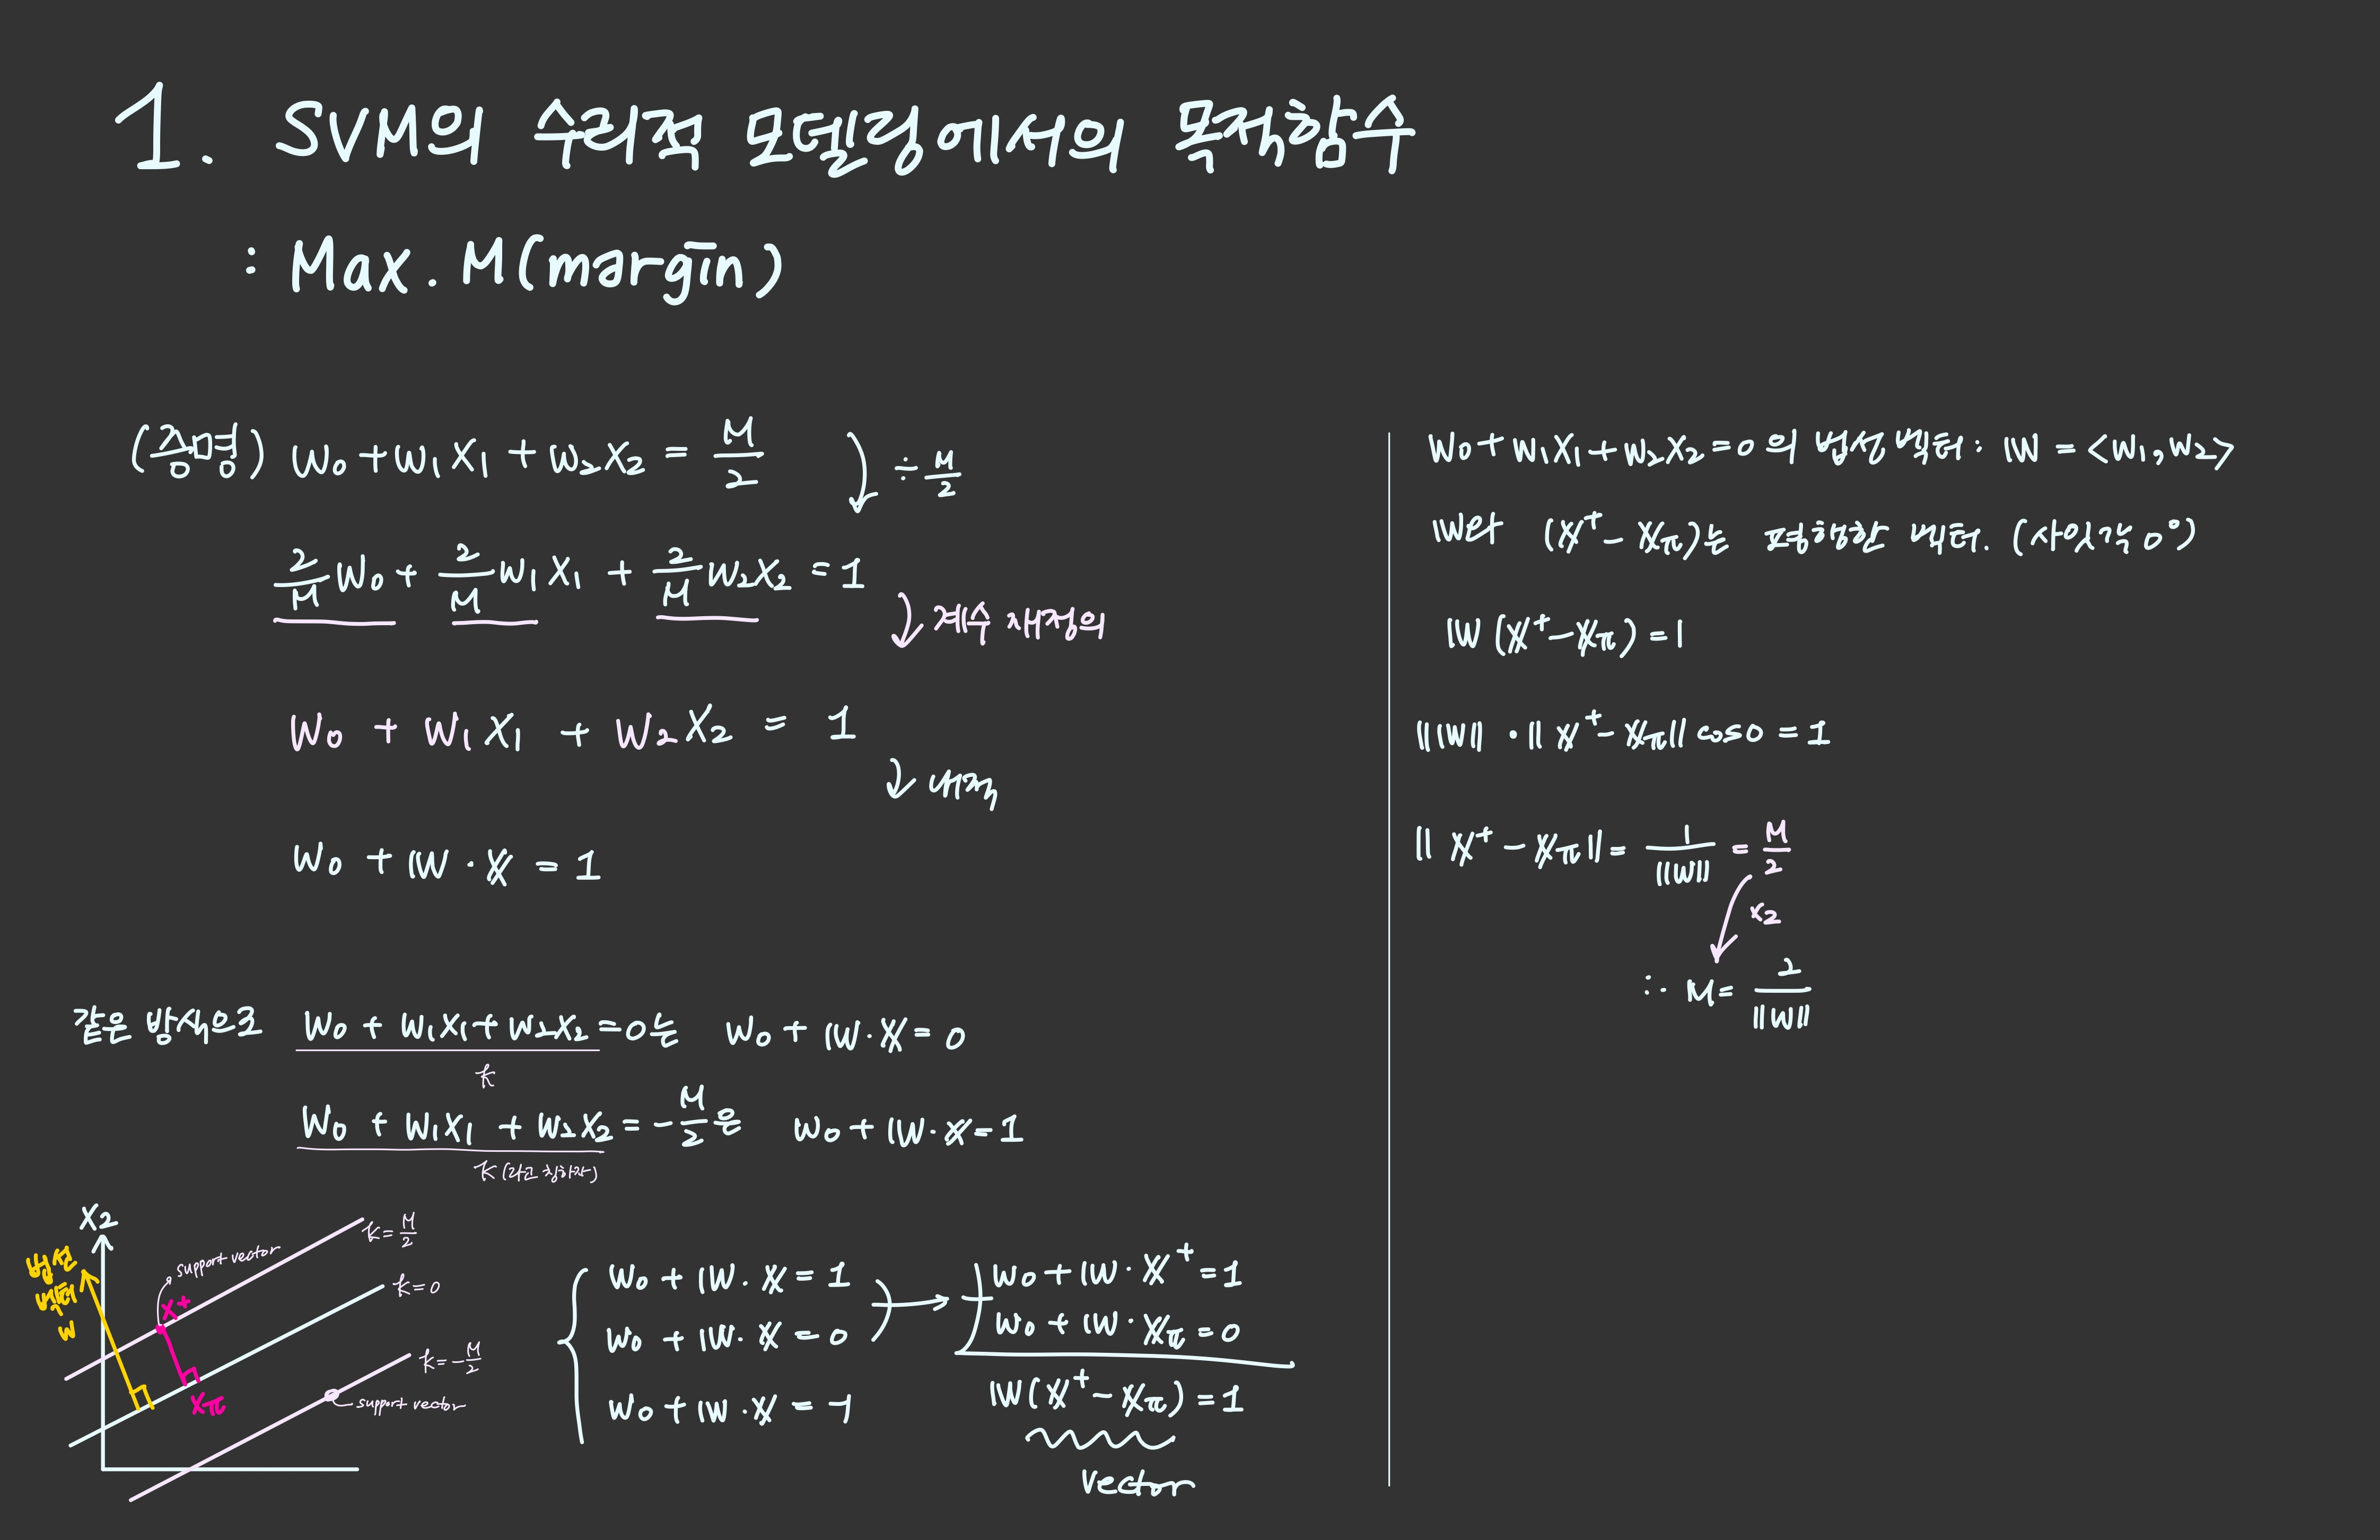

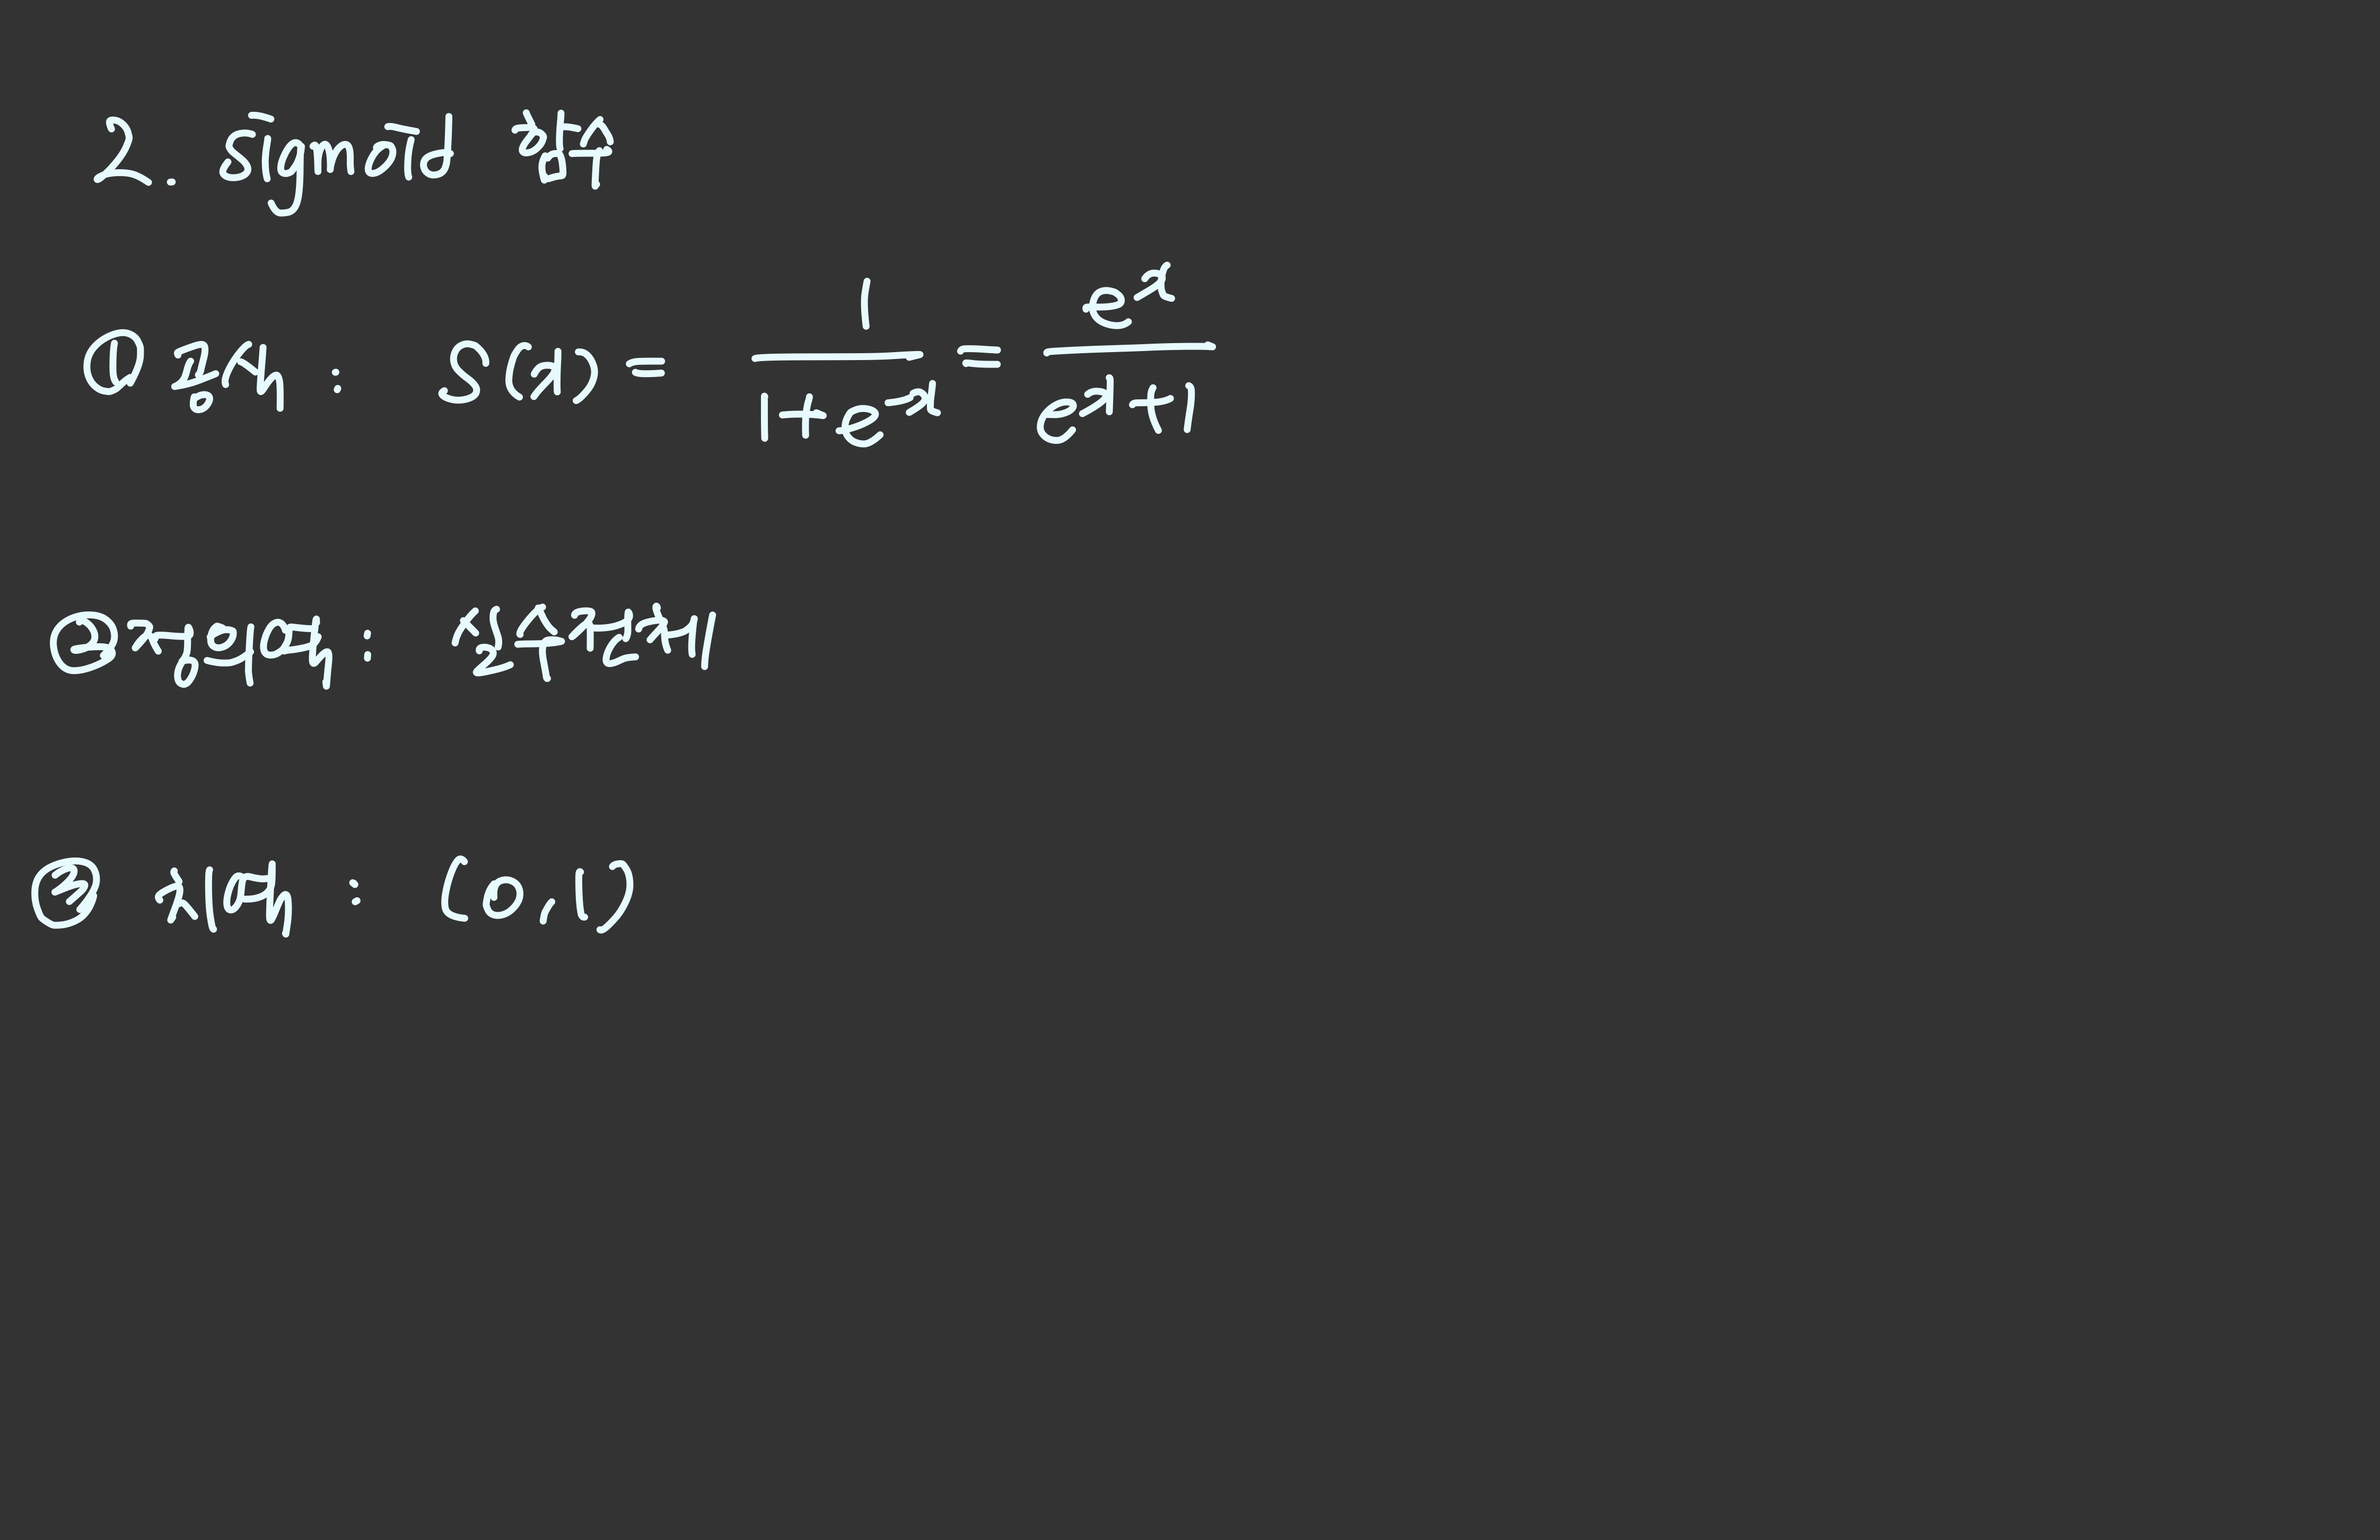

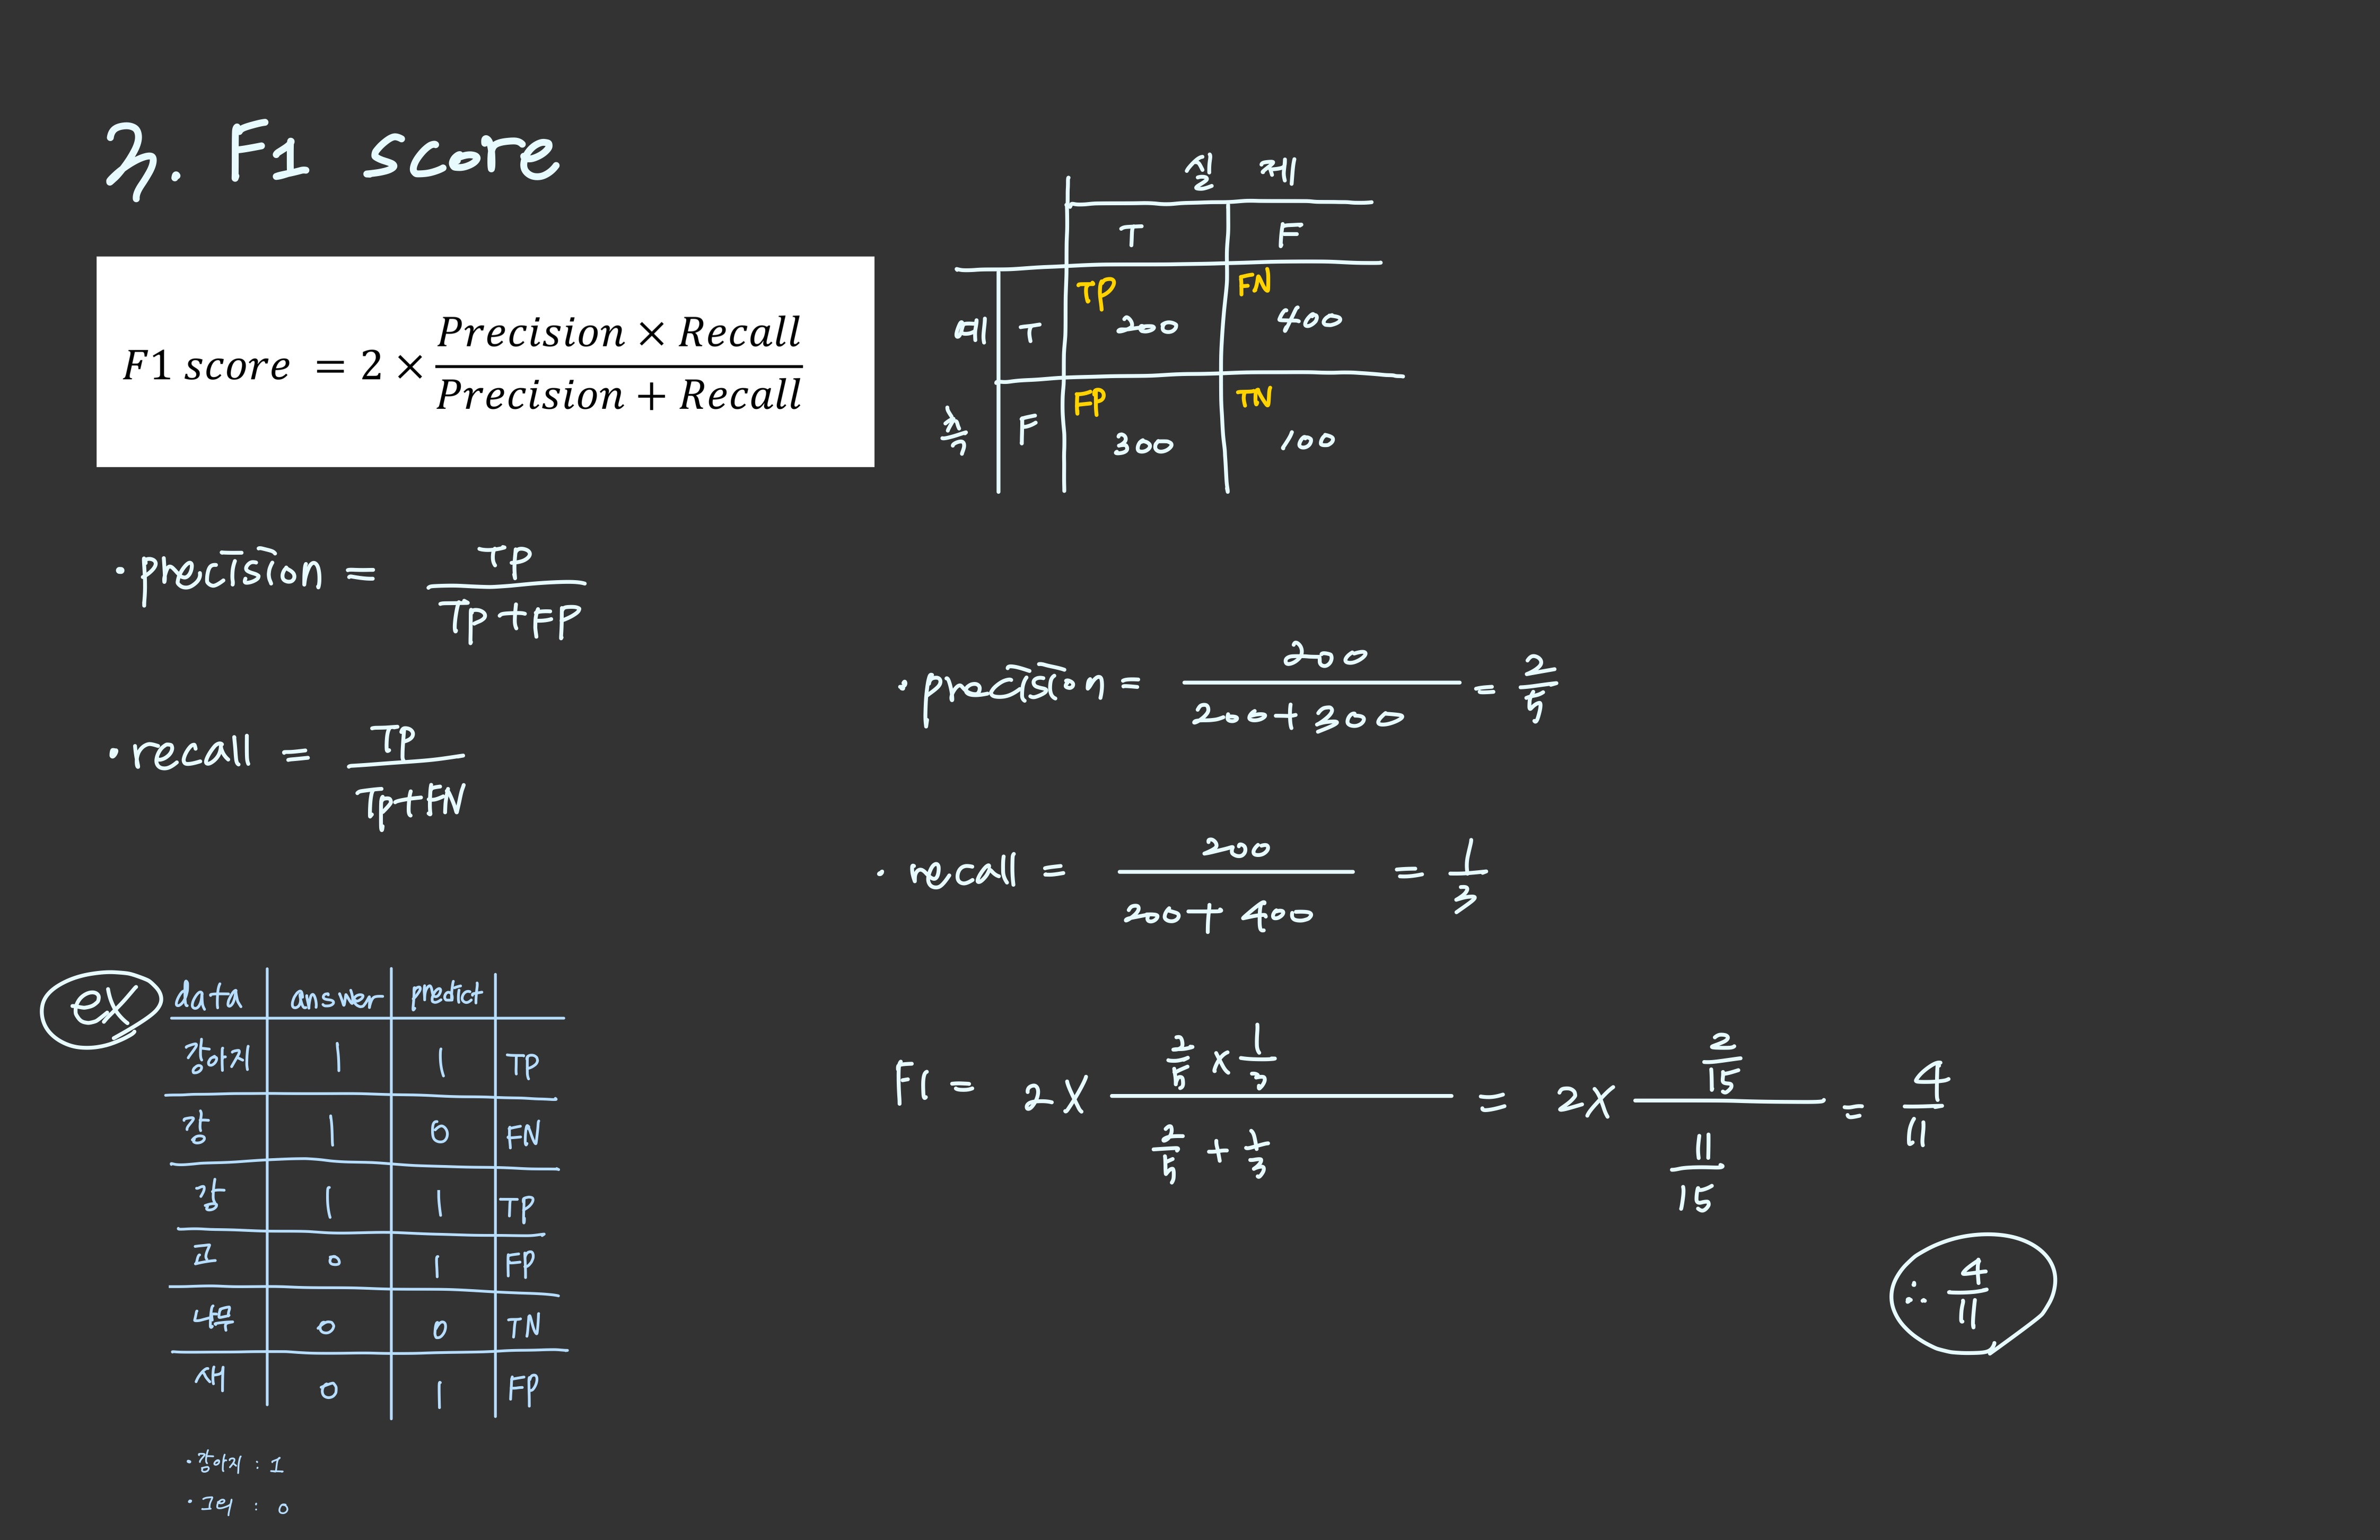

In [ ]:
#끝!